In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%run backwards_time_voter_model.ipynb

In [14]:
# Define parameters as in paper
alpha = 10e-3
L = 100

# grid_0 = init_grid(L)
MC_Steps = int(5e5)

species = voter_model_fast(L, alpha, MC_steps, kernel='nearest', W=3, eta=-1)

 41%|██████████████▍                    | 4109/10000 [00:00<00:00, 27687.78it/s]


In [15]:
species_ids = np.random.uniform(size=len(species))
print(len(species))

grid = np.zeros((L, L))
for i, specie in enumerate(species):
    for coord in specie:
        grid[coord] = species_ids[i]


156


[ 0.73915703 -0.82593561]


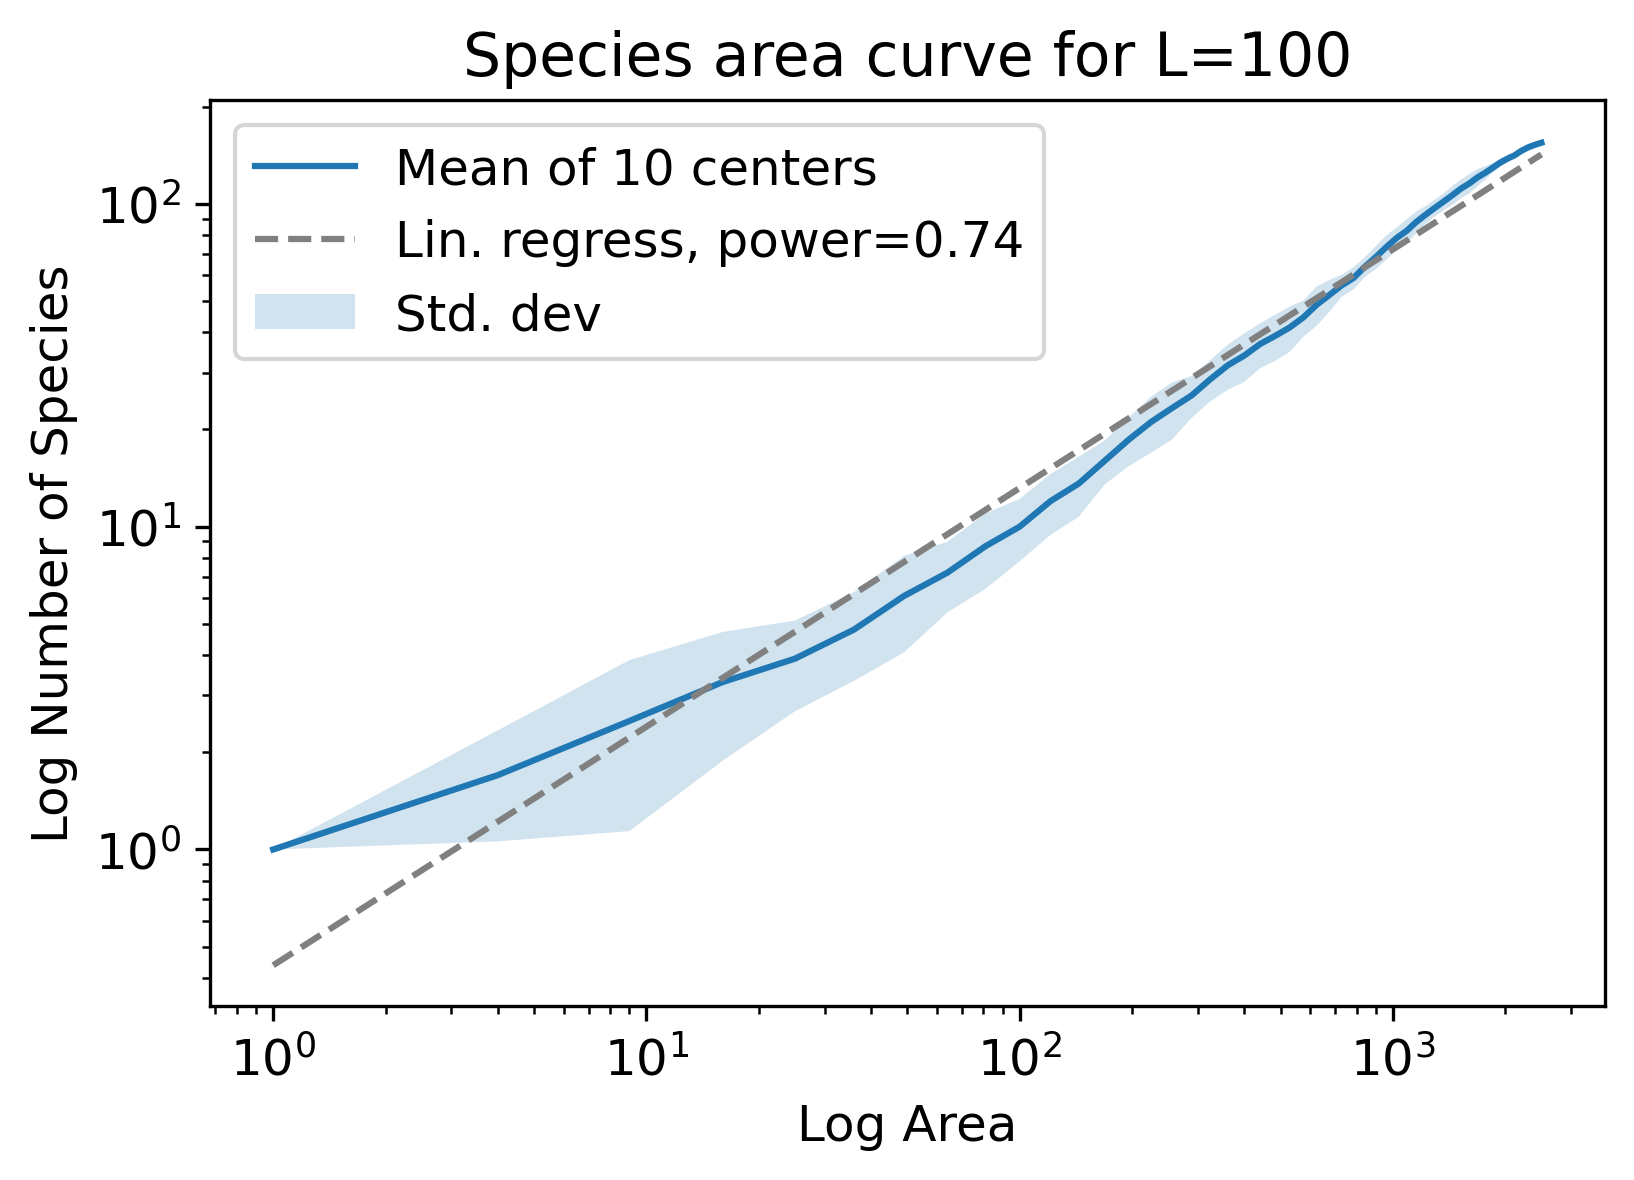

In [16]:
areas, species = sa_curve(grid)
spec_std_dev = np.std(species, axis=0)
spec_mean = np.mean(species, axis=0)

poly_coeffs = np.polyfit(np.log(areas), np.log(spec_mean), 1)
print(poly_coeffs)

plt.loglog(areas, spec_mean, label='Mean of 10 centers')
plt.loglog([areas[0], areas[-1]], 
           np.exp(poly_coeffs[1]) * np.array([areas[0], areas[-1]])**poly_coeffs[0], 
           color='grey', 
           linestyle='dashed',
           label=f'Lin. regress, power={round(poly_coeffs[0], 2)}')
plt.fill_between(areas, spec_mean-spec_std_dev, spec_mean+spec_std_dev, alpha=0.2, label='Std. dev')
plt.ylabel('Log Number of Species')
plt.xlabel('Log Area')
plt.title(f'Species area curve for L={L}')
plt.legend()
plt.show()